In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [69]:
# загрузка данных
df = pd.read_csv(r"C:\Users\romae\Downloads\archive (12)\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [70]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.groupby('Platform')

In [72]:
# группируем продажи по платформам
group_years = df\
   .groupby(['Platform'], as_index=False)\
   .agg({'Global_Sales': 'sum'})

In [173]:
platform_sales = df.groupby('Platform')\
    .agg({'Global_Sales': 'sum'})\
    .sort_values(by='Global_Sales', ascending=False)


In [174]:
platform_sales.head()

,Global_Sales
Platform,
PS2,1255.64
X360,971.63
PS3,939.43
Wii,908.13
DS,807.10


In [191]:
publisher = df.groupby('Publisher')\
    .agg({'Global_Sales': 'sum'})\
    .sort_values(by='Global_Sales', ascending=False)\
    .head(10)

In [192]:
publisher

,Global_Sales
Publisher,
Nintendo,1788.81
Electronic Arts,1116.96
Activision,731.16
Sony Computer Entertainment,606.48
Ubisoft,471.61
Take-Two Interactive,403.82
THQ,338.44
Konami Digital Entertainment,282.39
Sega,270.35


<Figure size 1000x600 with 0 Axes>

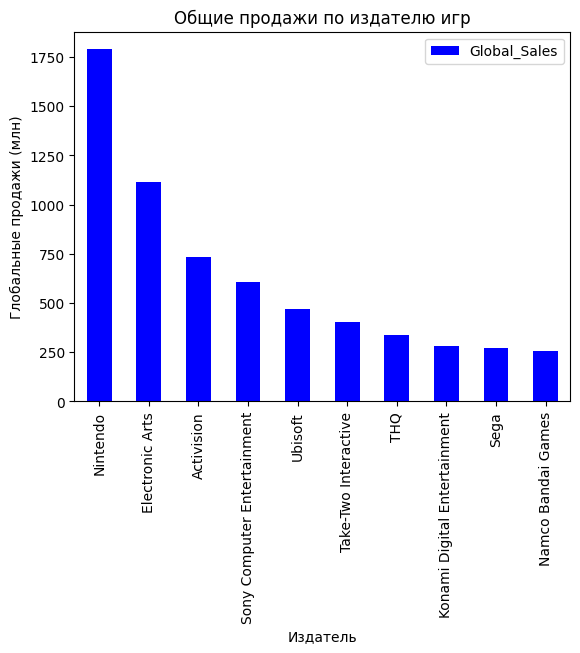

In [202]:
plt.figure(figsize=(10, 6))
publisher.plot(kind='bar', color='blue')
plt.title('Общие продажи по издателю игр')
plt.xlabel('Издатель')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

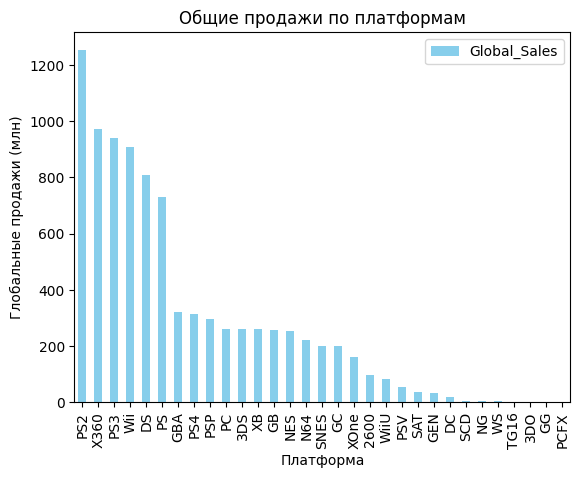

In [195]:
# Рисуем график общих продаж по платформам
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='bar', color='skyblue')
plt.title('Общие продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=90)
plt.show()

In [76]:
#группируем продажи по жанрам
genre_sales = df.groupby('Genre')\
    .agg({'Global_Sales': 'sum'})\
    .sort_values(by= 'Global_Sales', ascending=False)



<Figure size 1000x600 with 0 Axes>

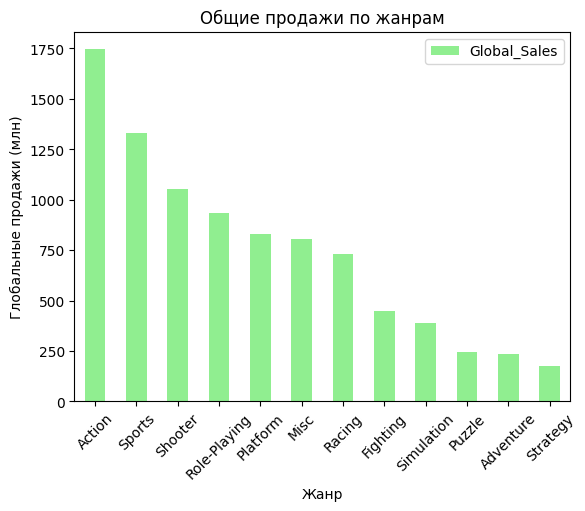

In [77]:
#Рисуем график продаж в зависимости от жанра
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='lightgreen')
plt.title('Общие продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=45)
plt.show()


In [78]:
#группируем продажи игр по годам
early_sales = df.groupby('Year_of_Release')\
    .agg({'Global_Sales':'sum'})


<Figure size 1200x600 with 0 Axes>

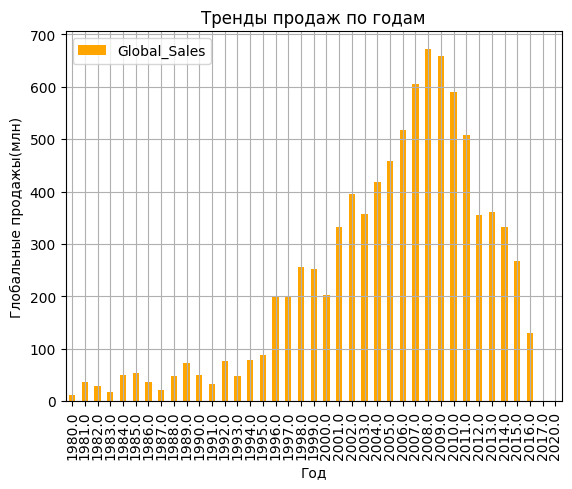

In [79]:
#рисуем график продаж по годам
plt.figure(figsize=(12, 6))
early_sales.plot(kind='bar', color='orange') 
plt.title('Тренды продаж по годам')
plt.xlabel('Год')
plt.ylabel('Глобальные продажы(млн)')
plt.grid()
plt.show()

In [80]:
#находим среднее значение продаж в зависимости от региона
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales']].mean()

In [81]:
region_sales.head()

NA_Sales    0.263330
EU_Sales    0.145025
JP_Sales    0.077602
dtype: float64

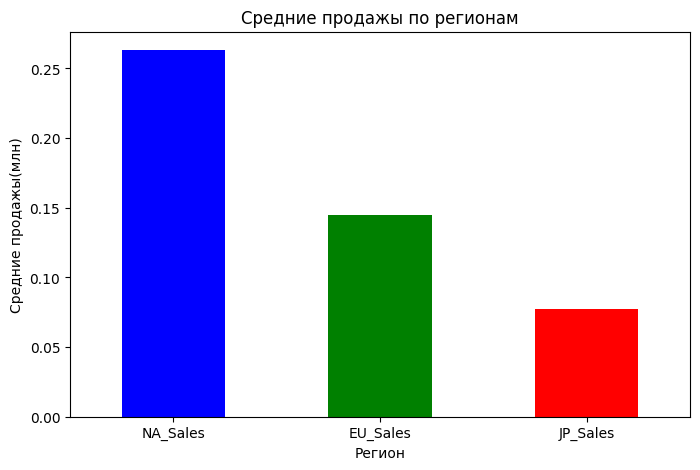

In [82]:
# рисуем график средних продаж по регионам
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color= ['blue', 'green', 'red'])
plt.title('Средние продажы по регионам')
plt.xlabel('Регион')
plt.ylabel('Средние продажы(млн)')
plt.xticks(rotation = 0)
plt.show()

In [163]:
# находим топ 10 игр по глобальным продажам
top_games_plat = df.nlargest(10, 'Global_Sales')

In [164]:
top_games_plat

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


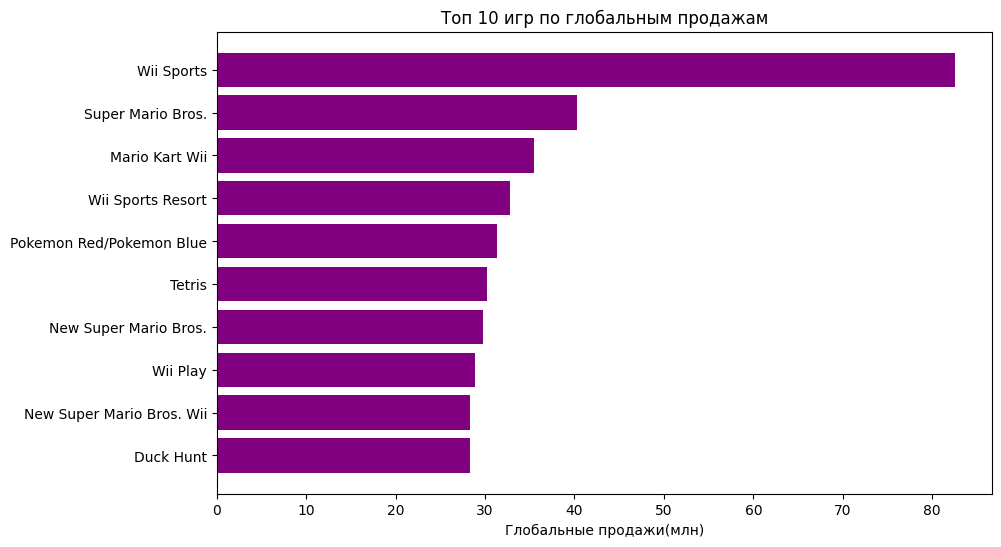

In [198]:
# график топ 10 игр по глобальным продаж
plt.figure(figsize=(10, 6))
plt.barh(top_games_plat['Name'], top_games_plat['Global_Sales'], color= 'purple')
plt.title('Топ 10 игр по глобальным продажам')
plt.xlabel('Глобальные продажи(млн)')
plt.gca().invert_yaxis()
plt.show()

In [89]:
# корреляция в зависимости от региона продаж
corelation = df[['NA_Sales', 'EU_Sales', 'JP_Sales']].corr()

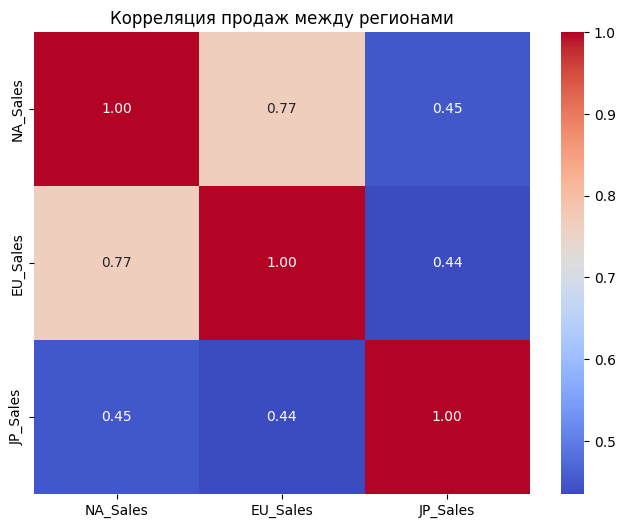

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(corelation, annot=True, cmap='coolwarm',
            fmt='.2f')
plt.title('Корреляция продаж между регионами')
plt.show()


In [158]:
# группируе глобальные продажи по годам 
sales_by_year = df.groupby('Year_of_Release')\
.agg({'Global_Sales': 'sum'})\
.reset_index()

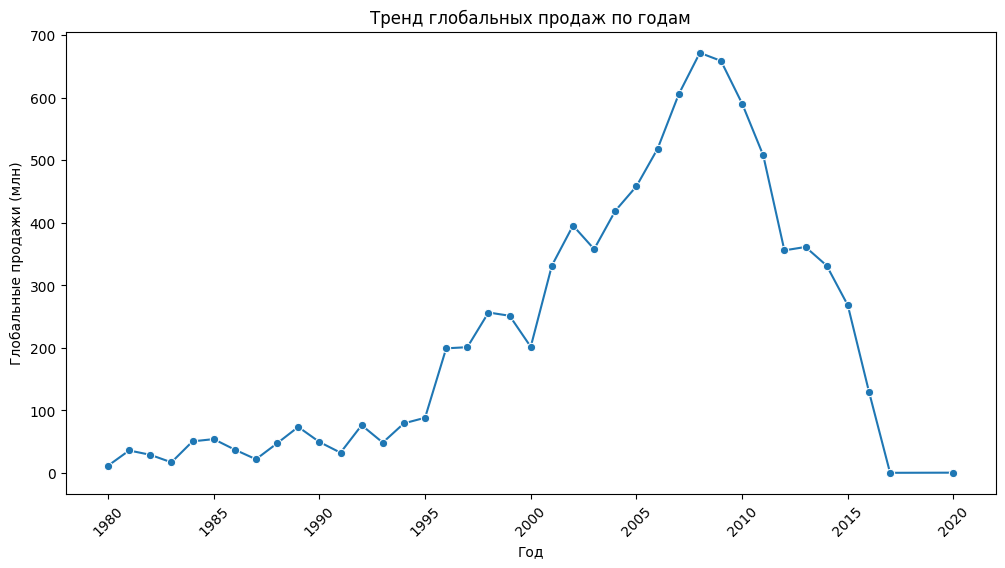

In [159]:
# глобальные продажи игр по годам
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_of_Release', y='Global_Sales', data=sales_by_year, marker='o')
plt.title('Тренд глобальных продаж по годам')
plt.xlabel('Год')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=45)
plt.show()

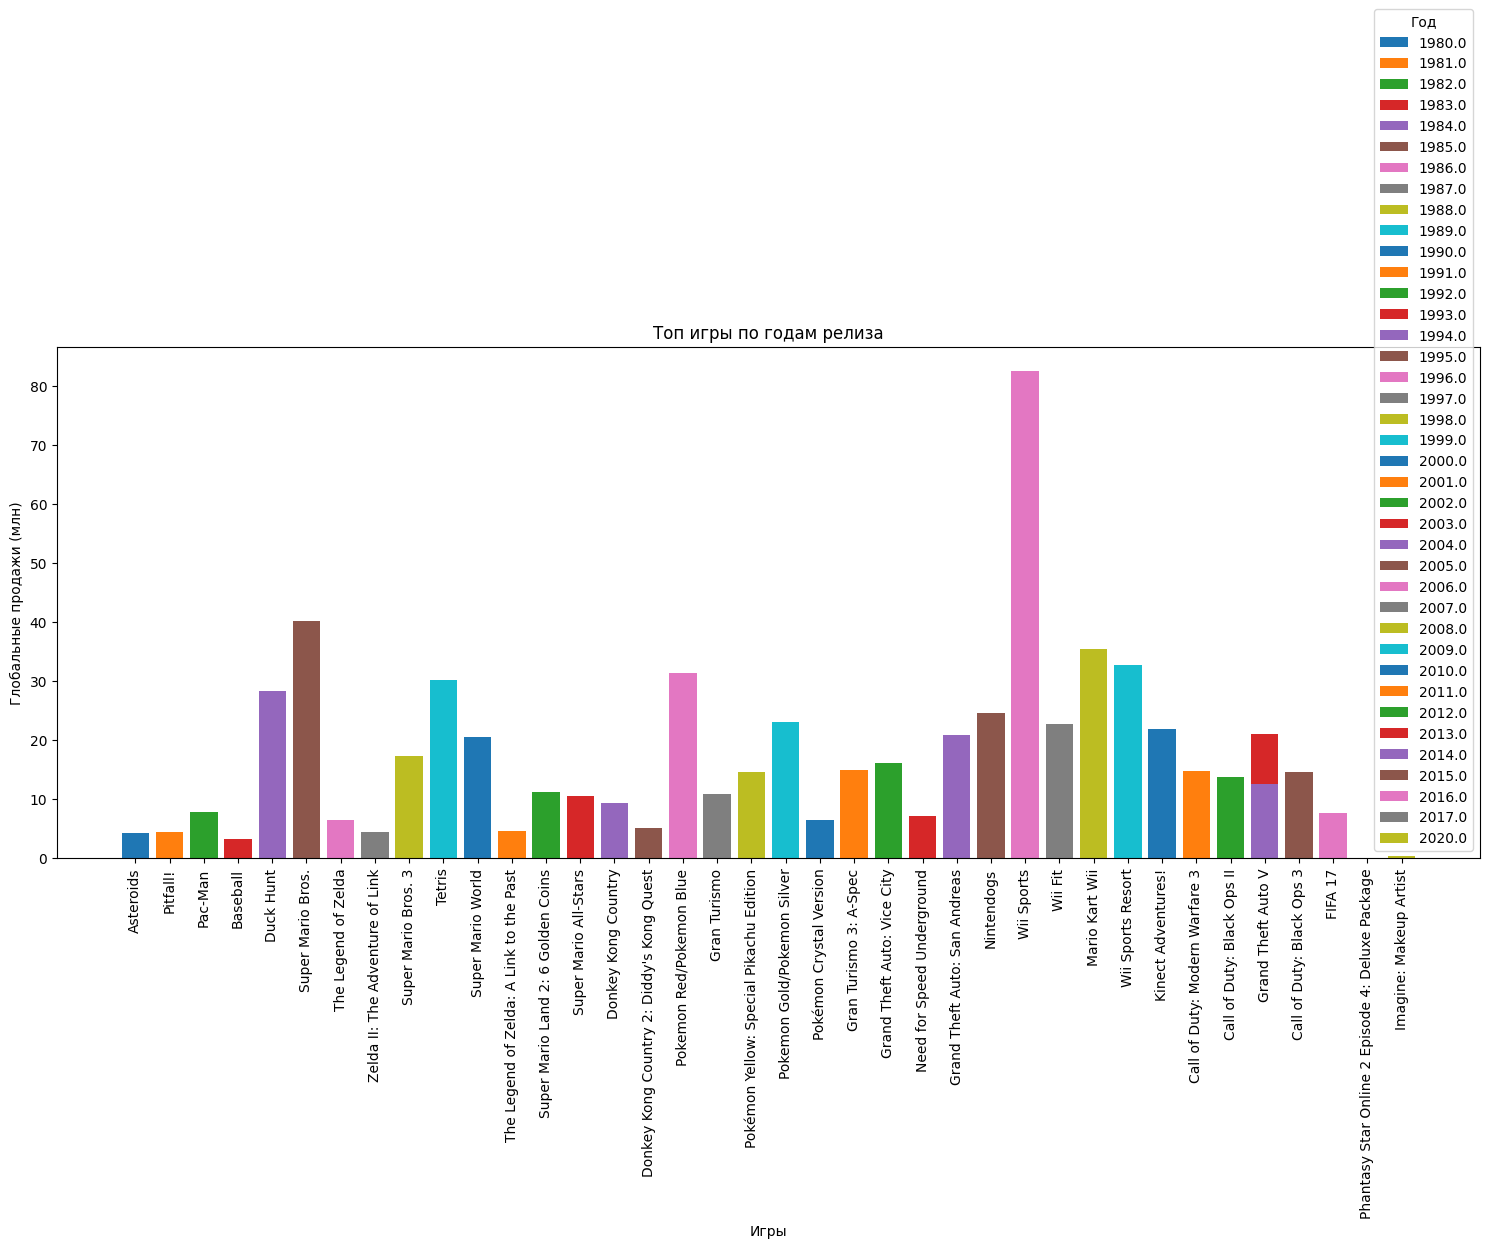

In [204]:
# Функция для получения топ-N игр по годам
def top_games_per_year(df, top_n=1):
    # Сортируем по годам и продажам, а затем выбираем топ-N
    top_games = df[['Year_of_Release', 'Name', 'Global_Sales']]
    top_games = top_games.sort_values(['Year_of_Release', 'Global_Sales'], ascending=[True, False])
    top_games = top_games.groupby('Year_of_Release').head(top_n).reset_index(drop=True)
    return top_games

# Получаем топ-3 игры по годам
top_games = top_games_per_year(df)

# Удаляем строки с NaN в 'Name'
top_games = top_games.dropna(subset=['Name'])

# Визуализация
plt.figure(figsize=(15, 10))

years = top_games['Year_of_Release'].unique()

for year in years:
    games = top_games[top_games['Year_of_Release'] == year]
    plt.bar(games['Name'], games['Global_Sales'], label=year)

plt.title('Топ игры по годам релиза')
plt.xlabel('Игры')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=90)
plt.legend(title='Год')
plt.tight_layout()
plt.show()


In [160]:
top_games


,Year_of_Release,Name,Global_Sales
0,1980.0,Asteroids,4.31
1,1981.0,Pitfall!,4.50
2,1982.0,Pac-Man,7.81
3,1983.0,Baseball,3.20
4,1984.0,Duck Hunt,28.31
5,1985.0,Super Mario Bros.,40.24
6,1986.0,The Legend of Zelda,6.51
7,1987.0,Zelda II: The Adventure of Link,4.38
8,1988.0,Super Mario Bros. 3,17.28
9,1989.0,Tetris,30.26
